Chapter 2 Simple Linear Regression

reference : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression


เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

อ่านข้อมูลไฟล์ csv จาก https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/house_prices.csv

และเเสดง 5 ตัวอย่างเเรก เพื่อตรวจสอบข้อมูล

In [ ]:
url = 'https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/house_prices.csv'
df=pd.read_csv(url, parse_dates=['date'])
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17983,8151600941,2014-08-28,340000.0,3,1.75,1720,10710,1.0,0,0,3,7,860,860,1957,0,98146,47.5092,-122.362,1480,10359
9505,1310930100,2015-03-18,525000.0,4,1.75,1570,16697,1.0,0,2,3,7,1030,540,1981,0,98052,47.6710,-122.135,1560,9698
12400,6446200060,2015-04-01,660000.0,3,2.50,2590,35640,1.0,0,0,3,9,2590,0,1987,0,98029,47.5516,-122.030,2590,31200
6692,4338800170,2014-05-07,246000.0,3,1.00,1400,7410,1.0,0,0,3,6,1400,0,1944,0,98166,47.4798,-122.343,1070,7410
7296,2780700020,2014-09-10,375000.0,4,2.50,1900,9428,2.0,0,0,3,8,1900,0,1978,0,98028,47.7628,-122.244,1830,10480
6688,1868901190,2014-08-07,650000.0,4,2.25,2100,2500,3.0,0,0,3,8,2100,0,2001,0,98115,47.6726,-122.298,1660,4000
5916,6303400290,2015-01-26,170000.0,2,1.00,860,8636,1.0,0,0,3,6,860,0,1924,0,98146,47.5081,-122.356,1100,8636
21352,7169500130,2014-12-19,495000.0,2,2.25,1460,1623,2.0,0,0,3,8,1260,200,2005,0,98115,47.6764,-122.301,1460,1137
7651,125059138,2014-07-22,510000.0,6,4.50,3300,7561,2.0,0,0,3,8,3300,0,1980,0,98052,47.6795,-122.104,2470,7561
7072,2624049073,2014-07-29,360000.0,2,1.00,780,4200,1.0,0,0,3,6,780,0,1920,0,98118,47.5381,-122.267,1620,6000


In [ ]:
df.head(10)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**ข้อสังเกต**  ในการอ่านข้อมูล เมื่อข้อมูลประกอบด้วยวันที่การเขียนโปรเเกรมจะต้องมีการระบุว่าข้อมูลในคอลัมน์ date ที่ถูกอ่านมาด้วยโปรเเกรมนั้นจะอยู่ในรูปเเบบของวันที่โดยใช้คำสั่ง parse_date หากไม่ทำการระบุเเล้วข้อมูลที่ถูกอ่านมาจะอยู่ในรูปของ string 

ทดลองดูภาพรวมของข้อมูลได้ดังนี้


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

จากภาพรวมข้อมูลจะเห็นว่าข้อมูลชุดนี้ประกอบด้วย 21,613 ตัวอย่างของข้อมูล  ในตัวอย่างนี้จะพิจารณาข้อมูลจำนวน 200 ตัวอย่าง โดยใช้คำสังดังนี้

In [ ]:
df=df[:200]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             200 non-null    int64         
 1   date           200 non-null    datetime64[ns]
 2   price          200 non-null    float64       
 3   bedrooms       200 non-null    int64         
 4   bathrooms      200 non-null    float64       
 5   sqft_living    200 non-null    int64         
 6   sqft_lot       200 non-null    int64         
 7   floors         200 non-null    float64       
 8   waterfront     200 non-null    int64         
 9   view           200 non-null    int64         
 10  condition      200 non-null    int64         
 11  grade          200 non-null    int64         
 12  sqft_above     200 non-null    int64         
 13  sqft_basement  200 non-null    int64         
 14  yr_built       200 non-null    int64         
 15  yr_renovated   200 non-

เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

ในตัวอย่างนี้เลือกพิจารณาความสัมพันธ์ระหว่าง ราคา (prize) กับ ขนาดของบ้าน (sqft_living) เพื่อทำการสร้างเเบบจำลองพื่อทำนายค่าบ้าน 

<Figure size 1152x648 with 0 Axes>

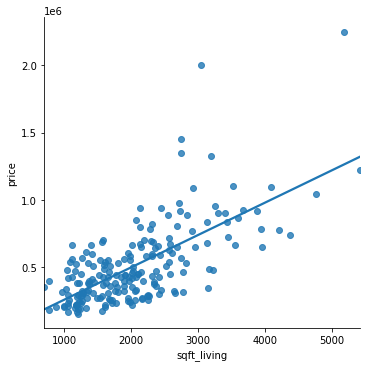

In [ ]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='sqft_living', y='price', data=df, ci=None)

โดยการใช้ seaborn ทำให้สามารถดูการกระจายตัวของข้อมูล (histogram) ในเเนวเเกน x เเละ y ได้ดังนี้ 

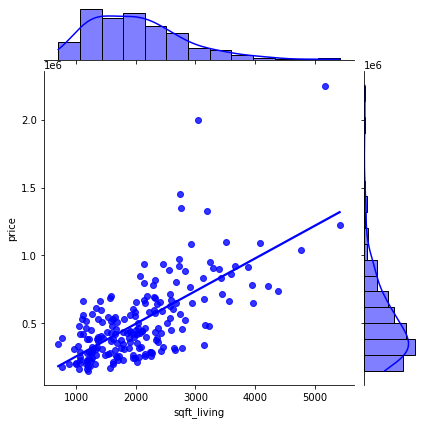

In [ ]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg', ci=None,
              color='blue');

**สร้าง Linear Regression model โดยใช้ library ของ scikit learn**

นำเข้าคลาสของ Linear Regression จาก scikit learn โดย


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression() # สร้าง object ชื่อ model จาก class ของ LinearRegression class

เนื่องจาก df['sqft_living'] เเละ df['price'] จะเป็นข้อมูลที่อยู่ในรูปเเบบ series จึงต้องทำการเเปลงให้อยู่ในรูปของ data frame ของ pandas โดยข้อมูลจะเเสดงในรูปเเบบของ dataframe ที่ประกอบด้วย index เเละ value ดังนี้

In [ ]:
X=df[['sqft_living']]
Y=df[['price']]
X

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
195,1690
196,1970
197,2150
198,1910


**ข้อสังเกต** การเเปลงข้อมูลสามารถทำได้อีกรูปเเบบหนึ่งโดยการปรับลักษณะของข้อมูลให้อยู่ในรูปของ numpy arry โดย

X = np.array(df['sqft_living']).reshape(-1,1)
Y = np.array(df['sqft_living']).reshape(-1,1)

In [ ]:
model.fit(X,Y)  # เรียนรู้ model linear regression จากข้อมูล X เเละ Y

LinearRegression()

ทดลองเเสดงค่า intercept ($\theta_{0}$) เเละ coefficient ($\theta_{1}$) เมื่อ

$y=\theta_{0}+\theta_{1} x$

In [ ]:
# intercept 
print(f'intercept = {model.intercept_}') 
# coefficient
print(f'coefficient = {model.coef_}') 

intercept = [17719.532113]
coefficient = [[240.03903463]]


ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า $R^2$

In [ ]:
model.score(X, Y) # R-squared

0.4638370397309386

ทดลองทำนายราคาบ้านจากแบบจำลองที่สร้างขึ้น โดยกำหนดให้บ้านมีเนื้อที่เท่ากับ 1000 sqft 

In [ ]:
x_new = 1000
model.intercept_ + model.coef_ * x_new

array([[257758.56674014]])

โดยราคาบ้านที่ทำนายได้ คือ 257,758.56674014 ดอลลาร์สหรัฐ

ในอีกทางหนึ่ง scikit-learn มี method สำหรับการทำนายค่าโดยทำได้ดังนี้


In [ ]:
model.predict([[x_new]]) # ค่าที่ส่งเข้า method predict จะต้องอยู่ในรูปของ 2D array

array([[257758.56674014]])

สร้างข้อมูลสำหรับทดสอบโดยสุ่มค่าตั้งเเต่ 500 ถึง 3000 จำนวน 10 จุด เเเละเเปลงให้เป็น 2d numpy array

In [ ]:
x_pred = np.linspace(500,3000,10).reshape(-1,1)

In [ ]:
model.predict(x_pred)

array([[137739.04942657],
       [204416.55904522],
       [271094.06866387],
       [337771.57828252],
       [404449.08790117],
       [471126.59751982],
       [537804.10713847],
       [604481.61675712],
       [671159.12637577],
       [737836.63599442]])

**Train test split**

การเเบ่งข้อมูลเพื่อเรียนรู้เเละทดสอบแบบจำลอง

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# เเบ่งข้อมูลไว้เรียนรู้ 70% เเละ ทดสอบ 30%
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3) 

In [ ]:
model.fit(X_train, y_train) # สร้าง model linear regression จากข้อมูล X_train เเละ y_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(model.predict(X_test), y_test)


60556069678.06408

ทดลองดูความเเม่นยำในการทำนายผลโดยใช้ค่า MSE

ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า $R^2$

In [ ]:
# model.score(X_train, y_train)

In [ ]:
# # step 3: model scoring
# from sklearn.metrics import mean_squared_error
# import math
# regression_model_mse = math.sqrt(mean_squared_error(X_test, y_test))
# R_squred = model.score(X_test, y_test) 

# print(f'mean_squared_error = {regression_model_mse}') 
# print(f'R_squared_error = {R_squred}') 

In [ ]:
# # step 4: predicting
# x_new = [
#     [1000],
#     [2000],
#     [2500]
# ]
# model.predict(x_new) # numpy array: X 2-dim array

Multiple Linear Regression


In [ ]:
df=pd.read_csv(url, usecols=[2, 3, 4, 5])
df=df[:25]
df.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


ทดลองดูความสัมพันธ์ระหว่างคุณลักษณะ

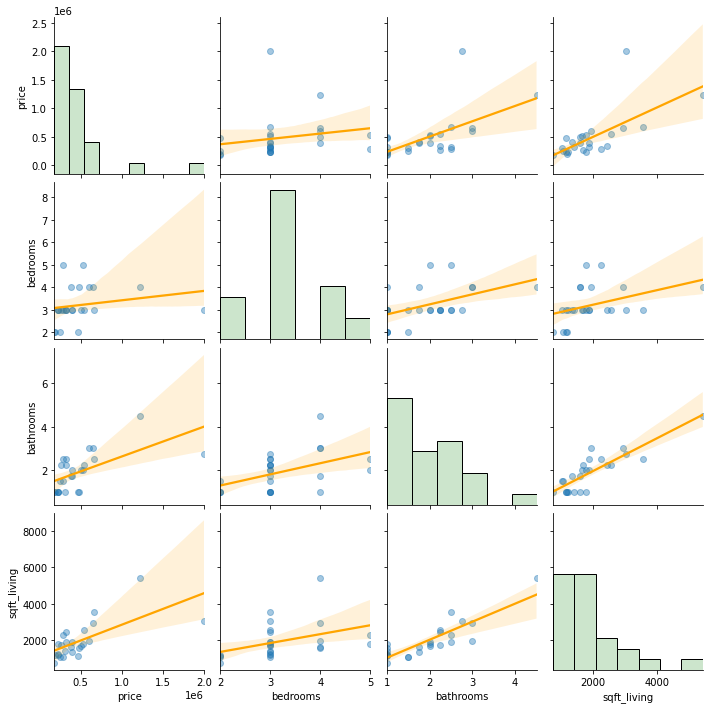

In [ ]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

สร้าง multiple linear regression model 

In [ ]:
X = df.drop(columns=['price'])
y = df['price']
# เเบ่งข้อมูลไว้เรียนรู้ 70% เเละ ทดสอบ 30%
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# X

ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า $R^2$

In [ ]:
model.score(X_train, y_train) # R-squared

0.4799117713693316

In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test)

22572796925.39498

In [ ]:
dx = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
dx

,y_true,y_pred
16,395000.0,478826.132414
11,468000.0,255775.523392
12,310000.0,289671.696710
8,229500.0,363505.168756
17,485000.0,302472.592301
20,385000.0,375778.766465
22,285000.0,558924.113766
3,604000.0,562647.908436


**Non-linear Regression**

ในตัวอย่างจะทำการสร้างแบบจำลองเเบบ Non-linear regression โดยการเรียกใช้คลาส PolynomialFeatures

**`Non-linear regression model`**
$$
{y=\theta _{0}+\theta _{1}x^{1}+\theta _{2}x^{2}+\theta _{3}x^{3}+\cdots +\theta _{n}x^{n}}
$$

อ่านข้อมูลใหม่จาก https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/worldbank_gdp_gini_birth_death_rate.csv ซึ่งเป็นข้อมูลอัตราการเกิดของประชากรไทยต่อ 1000 คนในรอบ 60 ปี ซึ่งความสัมพันธ์ของข้อมูลไม่เป็นเชิงเส้น


In [ ]:
url='https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/worldbank_gdp_gini_birth_death_rate.csv '
data=pd.read_csv(url)
data[data['country'].str.contains('Thailand')][:3]
x_col='year'
y_col='Death rate, crude (per 1,000 people)'
country='Thailand'

In [ ]:
# กรองข้อมูลโดยเลือกใช้เฉพาะข้อมูลของประเทศไทยเเละเก็บไว้ในตัวเเปร df
df.head()
df=data[data['country']==country].copy()  

In [ ]:
# df.head()

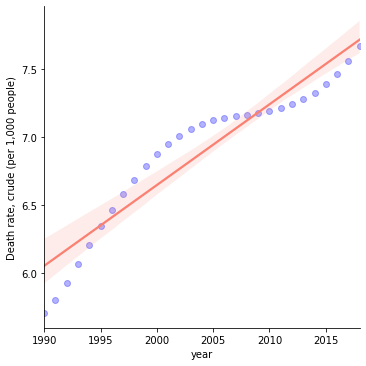

In [ ]:
sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=True, 
           scatter_kws={'alpha': .3, 'color': 'blue'},
           line_kws={'color': 'salmon'});

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) # กำหนดให้สร้างแบบจำลองโดยใช้ polynomial function degree 3
X=df[[x_col]]
y=df[y_col]

เตรียมข้อมูลโดยการเเปลงข้อมูลฝึกฝนเเเละข้อมูลทดสอบให้อยู่ในรูปเเบบยกกำลัง เช่น $x=4$ จะถูกจัดให้อยู่ในรูปของ $x^{1}=4, x^{2}=16$ และ  $x^{3}=64$

In [ ]:
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

สร้าง polynomial regression model

In [ ]:
pm = LinearRegression()
pm.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ทดลองเเสดงค่า intercept คือ $\theta _{0}$, $\theta _{1}$, $\theta _{2}$ และ $\theta _{3}$ 

In [ ]:
# intercept 
print(f'intercept = {pm.intercept_}') # theta0
# coefficient
print(f'coefficient = {pm.coef_}') # theta1 theta2 theta3

intercept = -2141932.196693306
coefficient = [ 0.00000000e+00  3.20051941e+03 -1.59409864e+00  2.64661850e-04]


ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า $R^2$ ของ poly regression model

In [ ]:
R_squred = pm.score(X_train_poly, y_train) 
print(f'R_squared_error = {R_squred}') 

R_squared_error = 0.996507908721042


Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

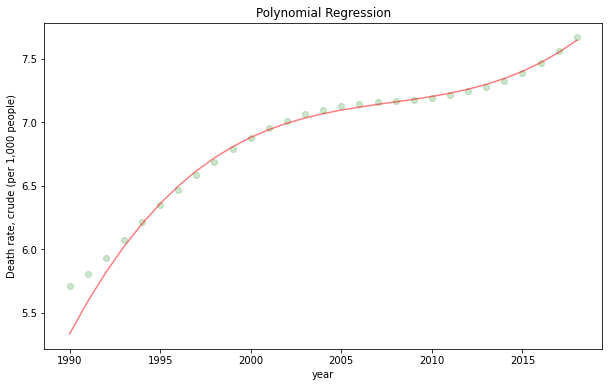

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'green', alpha=.2)
plt.plot(X, pm.predict(poly.fit_transform(X)), color = 'red', alpha=.5)
plt.title('Polynomial Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

In [ ]:
y_pred = pm.predict(poly.fit_transform(X_test))
mean_squared_error(y_pred, y_test)

0.03394602688949871

In [ ]:
dx = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
dx

,y_true,y_pred
6888,7.123,7.094116
6899,7.467,7.467302
6875,5.932,5.814754
6874,5.804,5.586093
6877,6.211,6.198788
6873,5.707,5.330885
